# Árvores de Decisão 

## Árvore de Decisão 

- Sequência de perguntas if-else sobre features individuais.
- Objetivo: inferir rótulos.
- Capaz de capturar relacionamentos não lineares entre recursos e rótulos.
- Não requer escalonamento de features (ex: normalização, padronização, ..)

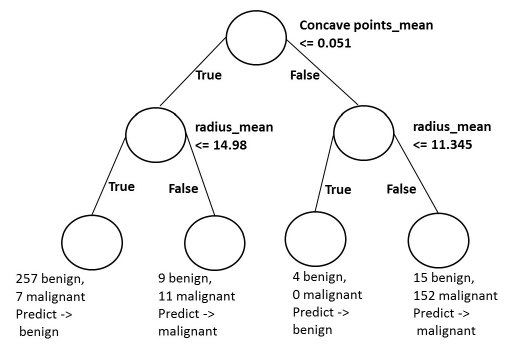

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets

In [ ]:
import sklearn
sklearn.__version__

O conjunto de dados de câncer de mama é um conjunto de dados de classificação binária.

* Classes 2
* Amostras por classe 212 (M), 357 (B)
* Total de amostras 569
* Dimensionalidade 30
* Atributos: real, positivo


### Carga do dataset e divisão estratificada dos dados de treino e test

In [ ]:
X, y = datasets.load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
X_train

### Treinando o classificador

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train,y_train)

### Calculando a acurácia  

In [ ]:
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
X.shape

### Quais features são mais importantes no processo de classificação?

A importância de um atributo é calculada como a redução total (normalizada) do critério trazido por esse atributo. Também é conhecido como a importância de Gini.

In [ ]:
dt.feature_importances_

In [ ]:
tree.plot_tree(dt, filled=True)

### E se usarmos somente as features com importância maior que zero? Como fica o resultado?

In [ ]:
import pandas as pd
df = pd.DataFrame(dt.feature_importances_)
df[ df[0] > 0.005 ]

In [ ]:
df.sort_values(by=0).plot(kind='barh')

### Selecionando apenas os melhores atributos

In [ ]:
idx = df[ df[0] > 0.005 ].index
idx.values

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train[:, idx],y_train)
y_pred = dt.predict(X_test[:, idx])
accuracy_score(y_test, y_pred)

In [ ]:
dt

In [ ]:
tree.plot_tree(dt, filled=True)

In [ ]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

In [ ]:
dt.feature_importances_

## Regiões de decisão

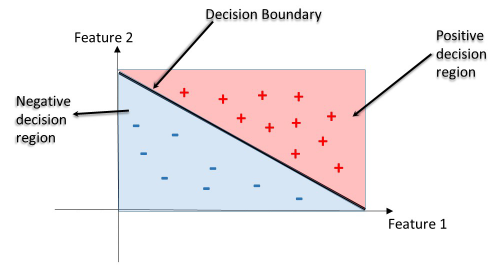

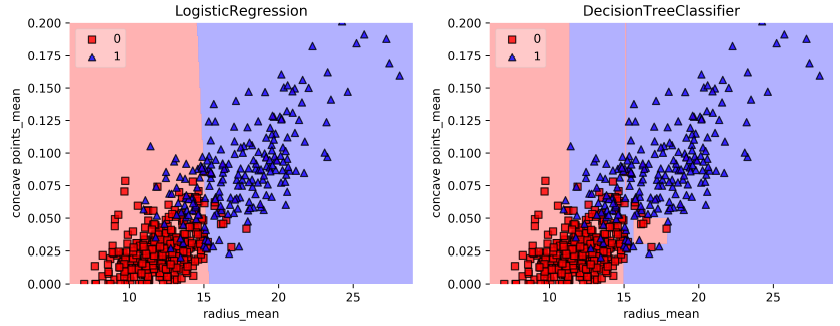

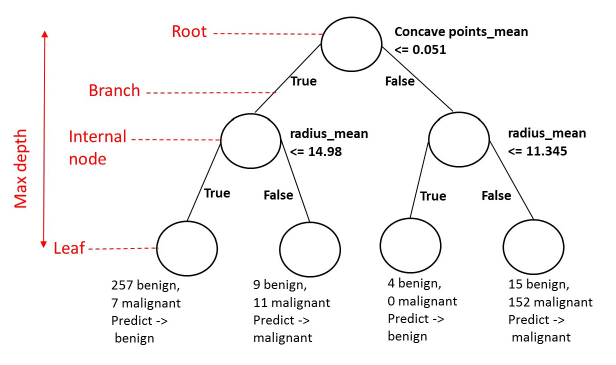

## Information Gain

Ganho de informação (IG) é a diferença entre a impureza do nó pai e a soma das impurezas do nó filho.

Quanto menor a impureza dos nós filhos, maior o ganho de informações.

- f	- feature
- sp - split-point

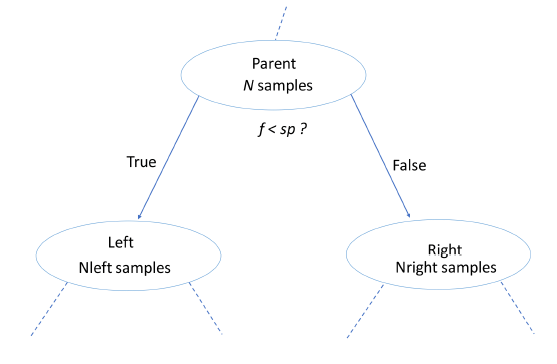

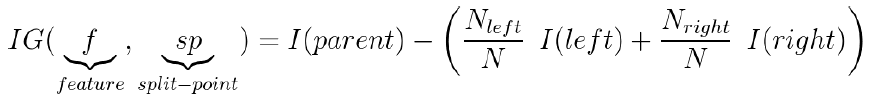

## Critérios para medir a impureza de um nó I:

- Gini index / impurity ($I_G$)
- Entropy ($I_H$)
- Classification Error ($I_E$)

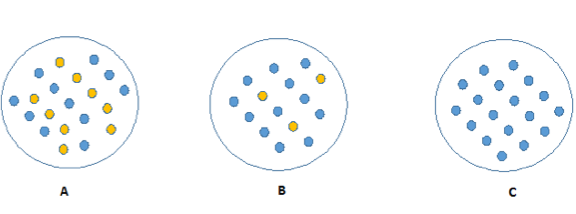

### Gini

- Critério para minimizar a probabilidade de classificação incorreta:

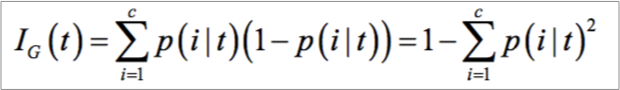

- Medida de variação em todas as classes dos dados.
- Na prática, tanto a impureza quanto a entropia de Gini normalmente produzem resultados muito semelhantes.
     - Portanto, muitas vezes não vale a pena gastar muito tempo avaliando árvores usando diferentes critérios de impureza

### Entropy

- A entropia tenta maximizar as informações mútuas na árvore.
- Medida de aleatoriedade. Mais dados aleatórios, maior a entropia.

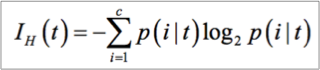

- p (i | t) é a proporção das amostras que pertencem à classe c para um nó específico t.
   - Zero - se todas as amostras em um nó pertencem à mesma classe.
    - Binary class:
      - p (i = 1 | t ) = 1 or p (i = 0 | t ) = 0
  - Maximal (1) - se tivermos uma distribuição de classe uniforme.
    - Binary class:
      - p (i = 1 | t ) = 0.5 and p (i = 0 | t ) = 0.5


### Erro de classificação
- Critério útil para remoção, mas não recomendado para o crescimento de uma árvore de decisão, pois é menos sensível a alterações nas probabilidades de classe dos nós.

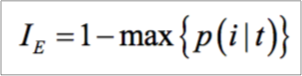

### Funcionamento
- Nós são crescidos recursivamente.
- Em cada nó, divida os dados com base em:
   - recurso fe sp de ponto de divisão para maximizar o IG (nó).
- Se IG (nó) = 0, declare o nó uma folha.

### Exemplo GINI

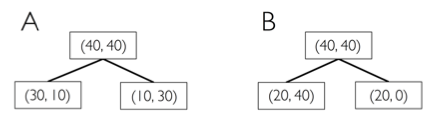



### Entendendo as medidas de impureza

In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
#X= np.array([[-3,7],[1,5], [1,2], [-2,0], [2,3], [-4,0], [-1,1], [1,1], [-2,2], [2,7], [-4,1], [-2,7]])
#y = np.array([3, 3, 3, 3, 4, 3, 3, 4, 3, 4, 4, 4])

In [ ]:
X= np.array([[2,3], [-4,0], [1,1], [1,1], [-2,2], [2,7]])
y = np.array([4, 3, 3, 4, 3, 4])

In [ ]:
model = tree.DecisionTreeClassifier(criterion='gini', random_state=42)

In [ ]:
model.fit(X, y)

In [ ]:
predicted= model.predict([[1,2],[3,4]])
print(predicted)

In [ ]:
model.feature_importances_

In [ ]:
df = pd.DataFrame(X)
df['label'] = y
df

In [ ]:
np.unique(y, return_counts=True)

### Cáculo do Gini

In [ ]:
1 - ( (3/6)**2 + (3/6)**2 )

In [ ]:
def gini(group):
    values, counts = np.unique(group, return_counts=True)
    print('counts: {}'.format(counts))
    tot = np.sum(counts)
    sum_sq = 0
    for i in counts:
        sum_sq += (i/tot)**2
    return 1 - sum_sq

In [ ]:
y

In [ ]:
gini(y)

In [ ]:
df_ = df.sort_values(by=[0,1])
df_

In [ ]:
gini([3]), gini([3,3]), gini([3,3,3,4]), gini([3,3,3,4]), gini([3,3,3,4,4,4]) 

In [ ]:
for i, v in enumerate(df_['label']):
    if i == 0:
        continue
    left = df_['label'][:i]
    gini_left = gini(left)
    right = df_['label'][i:]
    gini_right = gini(right)
    print('left:{}, right:{}'.format(gini_left, gini_right))

In [ ]:
tree.plot_tree(dt, filled=True)

In [ ]:
model.feature_importances_